# Histograms
---

A histogram is a data structure that is used to compress data and to represent its **probability distribution**. An histogram can have many dimensions but in practice, 1D and 2D histograms are most often used. We define the histogram by describing its bins. The bins are baskets that count the number of entries with a value falling within the bin range.

#### Basic imports

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [2]:
values = np.random.random_sample((100,))
print(f"Max value: {np.max(values)}, Min value: {np.min(values)}")

Max value: 0.974472217510602, Min value: 0.0027532319798754257


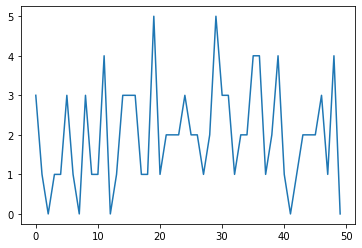

In [3]:
bins = 50
histogram_values = [0]*bins

for value in values:
    index = int(value*bins)
    histogram_values[index] += 1

plt.plot(histogram_values)
plt.show()

In computer vision, a histogram represents the **distribution of pixel intensities** (whether color or gray- scale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume an RGB color space in this example, so these pixel values will be in the range of 0 to 255.

When plotting the histogram, the X-axis serves as our “bins”. If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs. In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128) or [128, 255]. The number of pixels binned to the x-axis value is then plotted on the y-axis.

By simply examining the histogram of an image, you get a general understanding regarding the **contrast, brightness, and intensity distribution**.

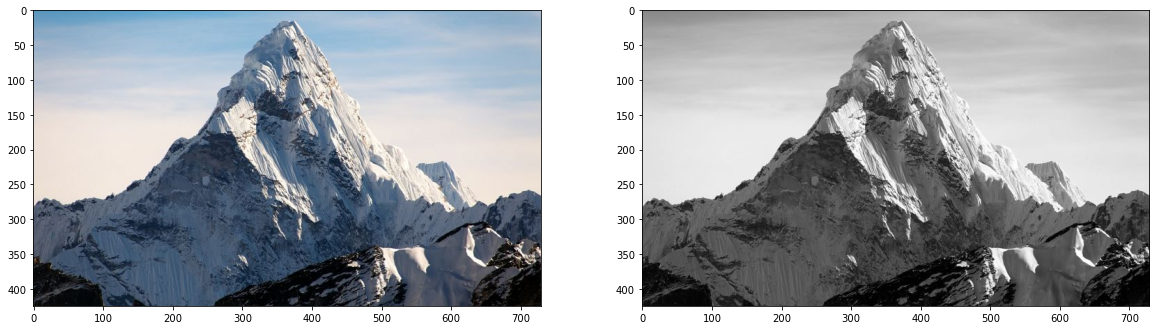

In [4]:
# image = cv2.imread('images/beach.png')
image = cv2.imread('images/olympus.jpg')


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(gray_image, cmap = 'gray')

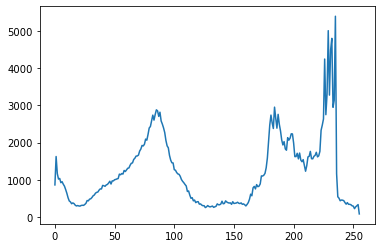

In [5]:
bins = 256
histogram_values = [0]*bins

    
plt.plot(histogram_values)
plt.show()

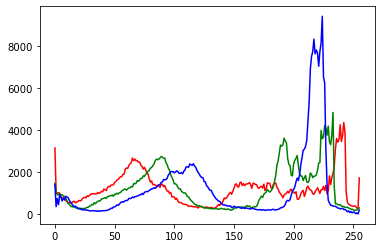

In [6]:
bins = 256
histogram_values_r = [0]*bins
histogram_values_g = [0]*bins
histogram_values_b = [0]*bins



plt.plot(histogram_values_r, color = "red")
plt.plot(histogram_values_g, color = "green")
plt.plot(histogram_values_b, color = "blue")
plt.show()

Using OpenCV, we can use the **calcHist** function. The parameters are the following:

1. images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage]. 
2. channels: This is a list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0,1,2]. 
3. mask: If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None. 
4. histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32,32,32].
5. ranges: Here we specify The range of possible pixel values. Normally, this is [0, 256] for each channel.

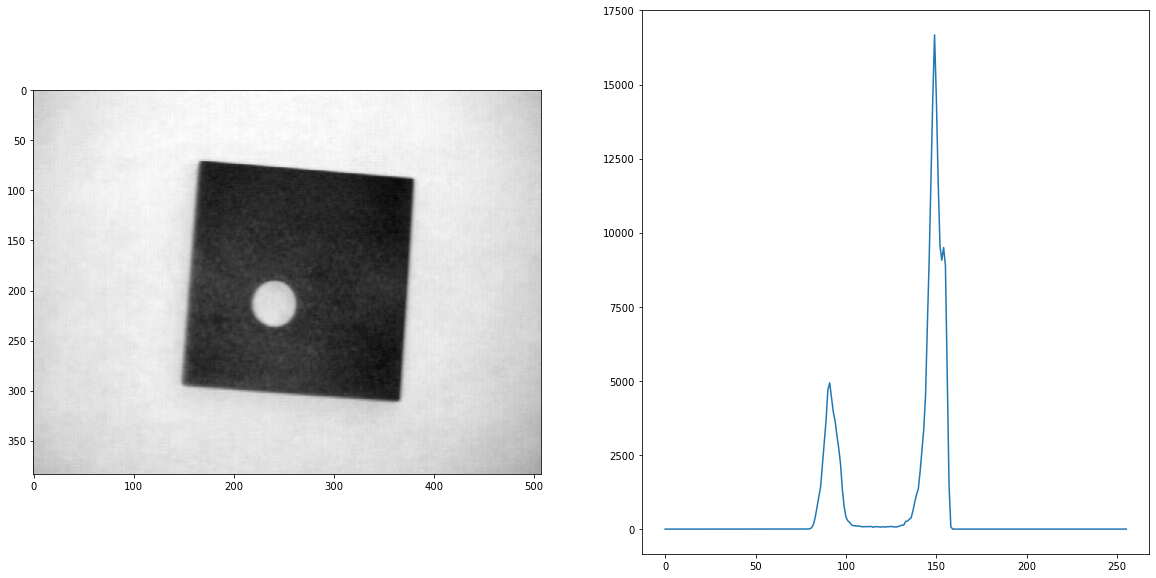

In [7]:
image = cv2.imread('images/wdg2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image, cmap='gray')
ax2.plot(hist)

A use for histograms is to find a point where we can threshold the image appropriately. For the previous image, a value of around 120 would separate the two sections of the histogram. 

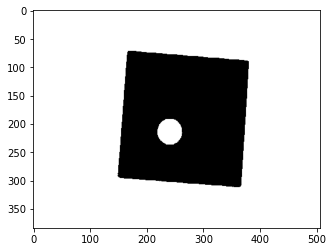

In [8]:
_, image_black = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)

plt.imshow(image_black, cmap='gray')

Another more interesting use of histograms is to adjust the contrast of images through the use of **Histogram Equalization**.

## Histogram Equalization

Histogram equalization improves the contrast of an image by “stretching” the distribution of pixels. Consider a his- togram with a large peak at the center of it. Applying his- togram equalization will stretch the peak out towards the corner of the image, thus improving the global contrast of the image. Histogram equalization is applied to grayscale images.

This method is useful when an image contains foregroun- ds and backgrounds that are both dark or both light. It tends to produce unrealistic effects in photographs; how- ever, it is normally useful when enhancing the contrast of medical or satellite images.

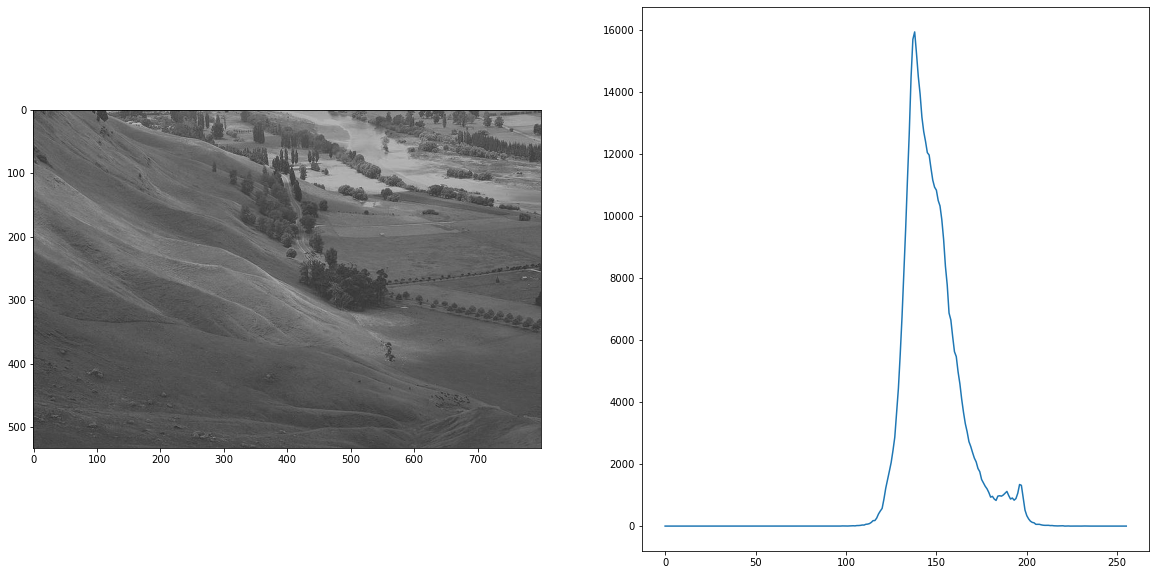

In [9]:
image = cv2.imread('images/Hawkes_Bay_NZ.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image, cmap='gray')
ax2.plot(hist)

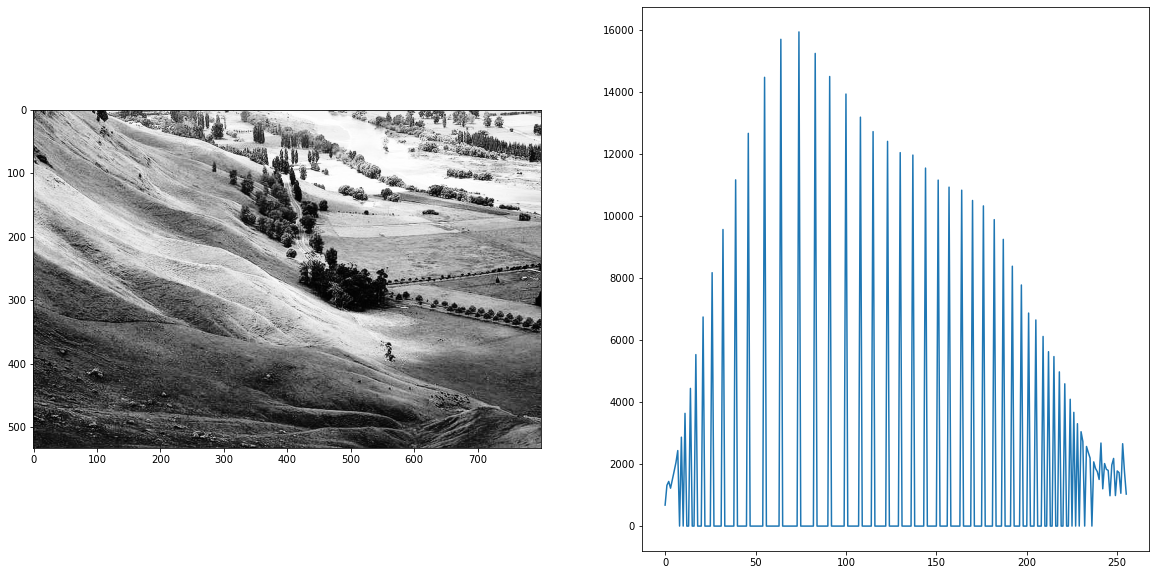

In [10]:
eq = cv2.equalizeHist(image)

hist = cv2.calcHist([eq], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(eq, cmap='gray')
ax2.plot(hist)

You can use histogram equalization on each channel of a color image.

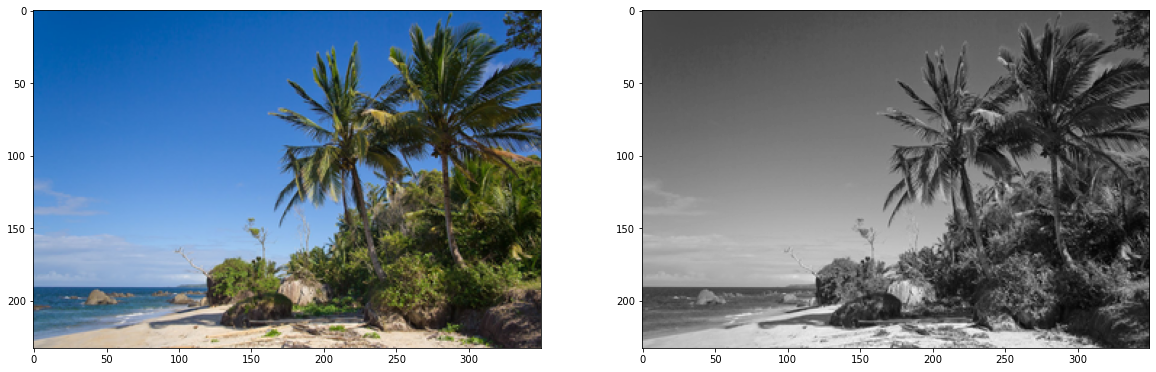

In [11]:
image = cv2.imread('images/beach.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(gray_image, cmap = 'gray')

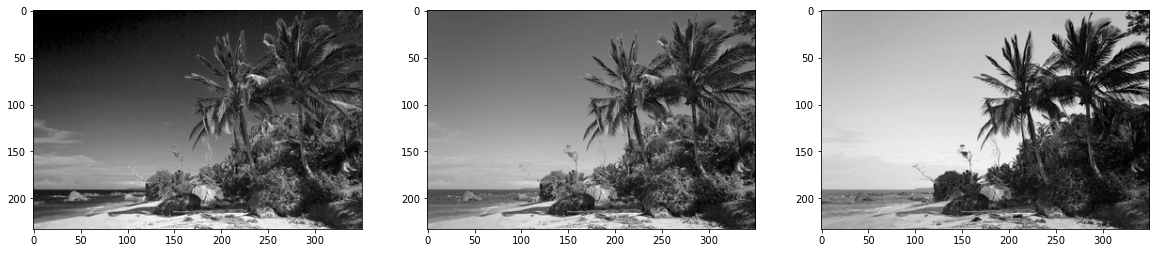

In [12]:
R, G, B = cv2.split(image)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(R, cmap='gray')
ax2.imshow(G, cmap = 'gray')
ax3.imshow(B, cmap = 'gray')

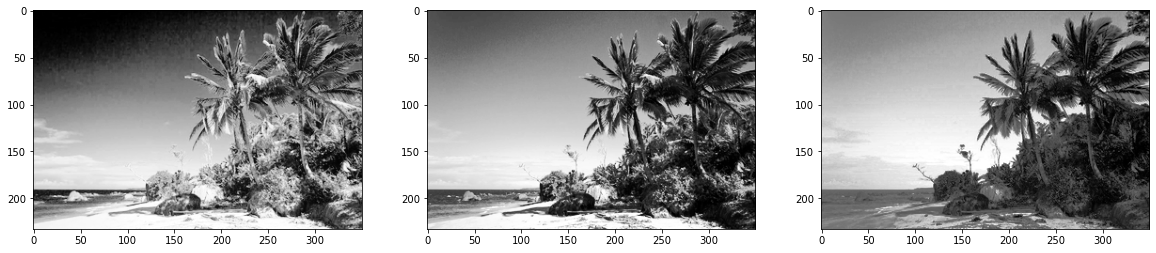

In [13]:
eq_R = cv2.equalizeHist(R)
eq_G = cv2.equalizeHist(G)
eq_B = cv2.equalizeHist(B)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(eq_R, cmap='gray')
ax2.imshow(eq_G, cmap = 'gray')
ax3.imshow(eq_B, cmap = 'gray')

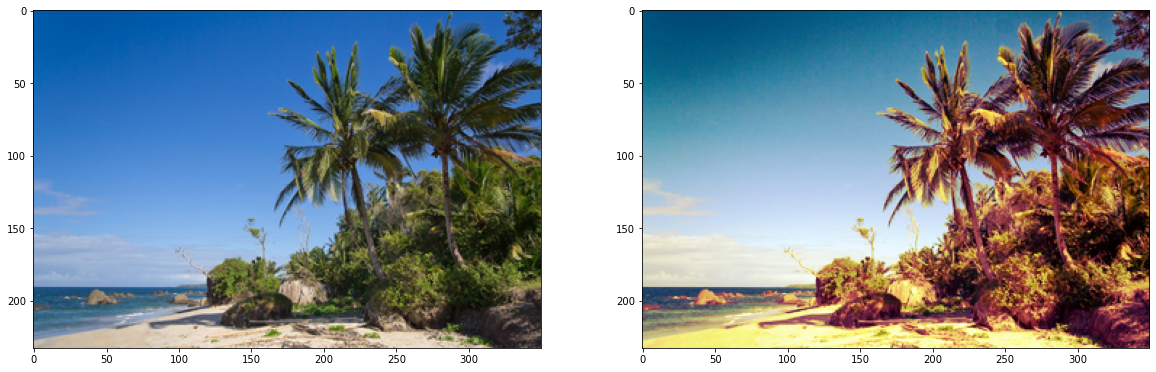

In [16]:
image_eq = cv2.merge([eq_R, eq_G, eq_B])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(image_eq)